Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.auto_modeler import AutoCluster
from eflow.data_pipeline_segments import DataEncoder

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import copy
import pickle
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Embarked,string
Cabin,string
Pclass,string
Sex,string
Survived,bool
Parch,integer
SibSp,integer
Fare,float
Age,float


In [11]:
qualtative_features = df_features.string_features() | df_features.categorical_features()
qualtative_features

{'Cabin', 'Embarked', 'Pclass', 'Sex'}

# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [12]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "Name"
Removing the feature: "PassengerId"
Removing the feature: "Ticket"


In [13]:
main_pipe.perform_pipeline(df,
                           df_features)

In [14]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,22.000000,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,38.000000,1,0,71.2833,True,False,False,True,False,False,True,False
2,1,26.000000,0,0,7.9250,False,False,True,False,False,True,True,False
3,1,35.000000,1,0,53.1000,True,False,False,False,False,True,True,False
4,0,35.000000,0,0,8.0500,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,False,True,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,False,True,True,False
888,0,28.312774,1,2,23.4500,False,False,True,False,False,True,True,False
889,1,26.000000,0,0,30.0000,True,False,False,True,False,False,False,True


# Generate clustering models with automodeler


Inspecting scaled results!


,Mean,Standard Dev
Survived,3.987333e-17,1.0
Age,-4.944293e-16,1.0
SibSp,4.386066e-17,1.0
Parch,5.382900e-17,1.0
Fare,3.987333e-18,1.0
Pclass_1,-7.575933e-17,1.0
Pclass_2,1.993666e-17,1.0
Pclass_3,-6.778466e-17,1.0
Embarked_Cherbourg,-1.993666e-17,1.0
Embarked_Queenstown,0.000000e+00,1.0


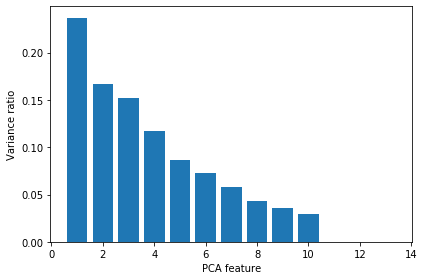

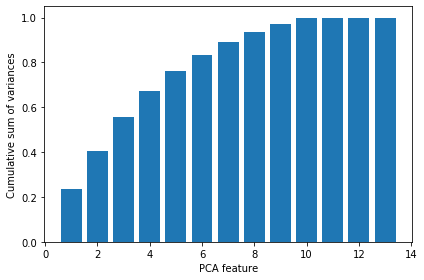


Inspecting applied scaler and pca results!


,Mean,Standard Dev
PCA_Feature_1,-1.594933e-17,1.755623e+00
PCA_Feature_2,-7.177199e-17,1.473689e+00
PCA_Feature_3,-3.189866e-17,1.404598e+00
PCA_Feature_4,-3.588600e-17,1.236644e+00
PCA_Feature_5,-2.791133e-17,1.062925e+00
PCA_Feature_6,-5.980999e-18,9.733969e-01
PCA_Feature_7,4.386066e-17,8.676079e-01
PCA_Feature_8,1.594933e-17,7.507034e-01
PCA_Feature_9,6.180366e-17,6.864172e-01
PCA_Feature_10,-6.977833e-17,6.156816e-01


After applying pca with a cutoff percentage 0.8% for the cumulative index. Using features 1 to 6
Old shape (891, 13)
New shape (891, 6)

Inspecting data after final scaler applied!


,Mean,Standard Dev
PCA_Feature_1,-3.987333e-18,1.0
PCA_Feature_2,-1.594933e-17,1.0
PCA_Feature_3,-4.984166e-18,1.0
PCA_Feature_4,-1.395567e-17,1.0
PCA_Feature_5,-3.987333e-18,1.0
PCA_Feature_6,5.980999e-18,1.0


Found past models in directory structure! Attempting to re-initalize models...
Cure_Clusters=2 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Cure/Clusters=2/Cure_Clusters=2.pkl

Cure_Clusters=9 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Cure/Clusters=9/Cure_Clusters=9.pkl

Cure_Clusters=3 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Cure/Clusters=3/Cure_Clusters=3.pkl

Cure_Clusters=4 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Cure/Clusters=4/Cure_Clusters=4.pkl

Cure_Clusters=11 was found at /Users/ericcacciavillani/De

In [15]:
auto_cluster = AutoCluster(df,
                           project_sub_dir=dataset_name,
                           overwrite_full_path=None,
                           notebook_mode=True,
                           pca_perc=.8)

### Temporialy remove dataframe to save RAM for processing

In [16]:
del df

# Inspect Hierarchical models

In [17]:
# auto_cluster.visualize_hierarchical_clustering()

Cure Elbow Seq Count 1: 100%|██████████| 11/11 [00:01<00:00, 10.13it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])


convex
False
elbow_cluster:3


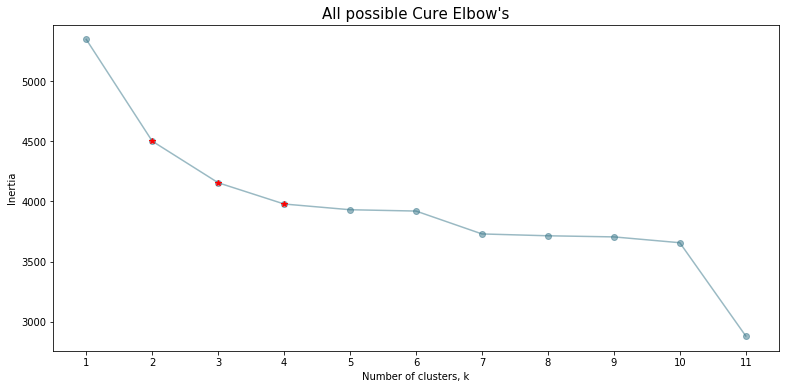

[5345.999999999996, 4501.091589836301, 4155.5767308676395, 3978.984955755752, 3931.4652223446183, 3920.4942373284757, 3730.357059730127, 3715.0919218096747, 3705.809207545254, 3657.4383838151193, 2882.6649067349017]


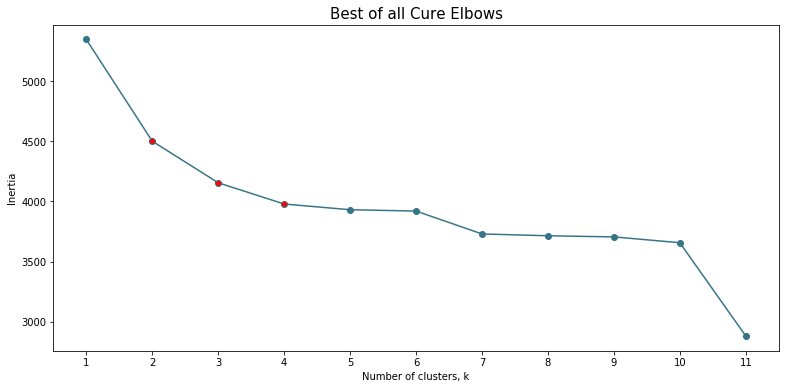

,Proximity Knees,Counts
0,2,1
1,3,1
2,4,1


,Main Knees,Counts
0,3,1


Fuzzy C-Means Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 12.16it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit m

concave
True
elbow_cluster:6
concave
True
elbow_cluster:7
concave
True
elbow_cluster:6
concave
True
elbow_cluster:6
concave
True
elbow_cluster:6
concave
True
elbow_cluster:7
concave
True
elbow_cluster:6
concave
True
elbow_cluster:6
concave
True
elbow_cluster:6
concave
True
elbow_cluster:6


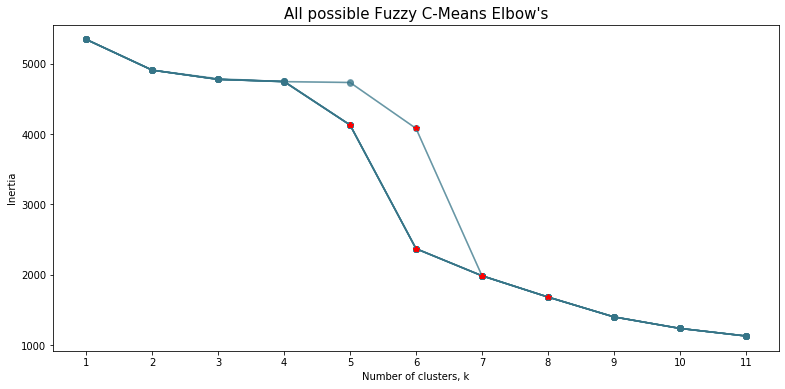

[5345.999999999996, 4909.510826119634, 4777.946224963687, 4745.940188073309, 4129.482140450524, 2371.081276090588, 1985.9894627564358, 1683.6842207926984, 1401.4090593157669, 1237.7644835798546, 1129.9284793236557]


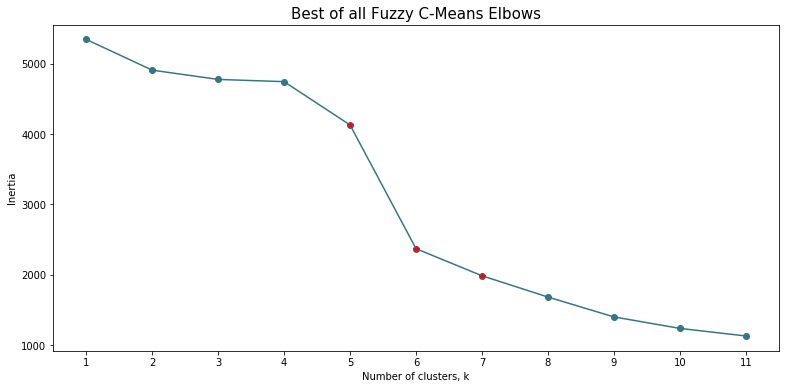

,Proximity Knees,Counts
1,6,10
2,7,10
0,5,8
3,8,2


,Main Knees,Counts
0,6,8
1,7,2


K-Medians Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 11.20it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may b

convex
False
elbow_cluster:7
convex
False
elbow_cluster:7
convex
False
elbow_cluster:4
convex
False
elbow_cluster:4
convex
False
elbow_cluster:4
convex
False
elbow_cluster:7
convex
False
elbow_cluster:7
convex
False
elbow_cluster:7
convex
False
elbow_cluster:4
convex
False
elbow_cluster:7


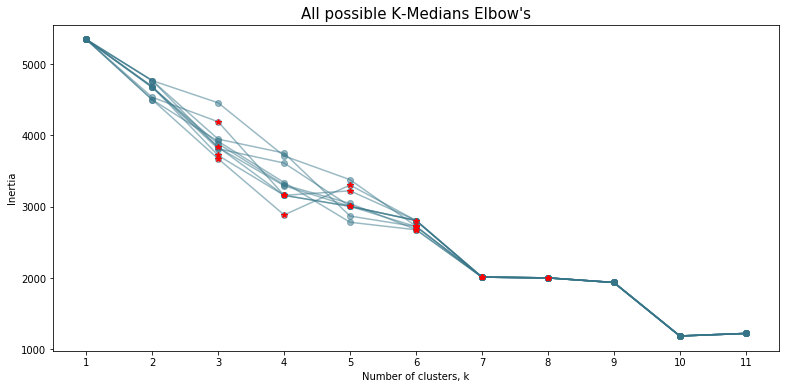

[5345.999999999996, 4769.071391049416, 3831.3840956815948, 3294.6491362710362, 3006.6319116042946, 2808.098479255926, 2014.5453123462937, 2003.767425273727, 1939.0594338434253, 1189.3868282888945, 1224.9253303064186]


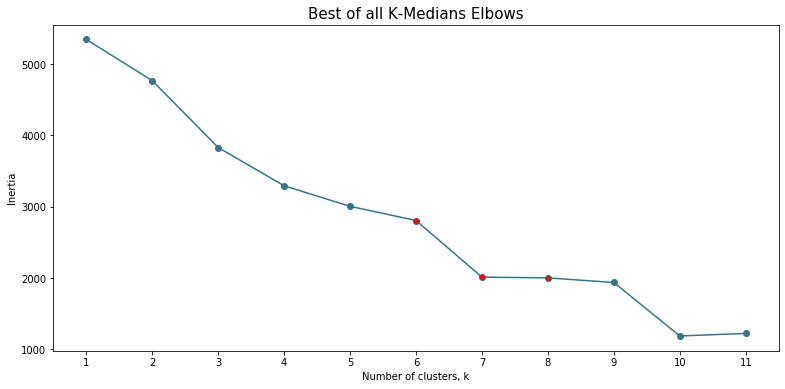

,Proximity Knees,Counts
0,6,6
1,7,6
2,8,6
3,3,4
4,4,4
5,5,4


,Main Knees,Counts
0,7,6
1,4,4


K-Means Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 18.26it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be 

convex
False
elbow_cluster:7
convex
False
elbow_cluster:6
convex
False
elbow_cluster:5
convex
False
elbow_cluster:6
convex
False
elbow_cluster:6
convex
False
elbow_cluster:7
convex
False
elbow_cluster:7
convex
False
elbow_cluster:7
convex
False
elbow_cluster:5
convex
False
elbow_cluster:7


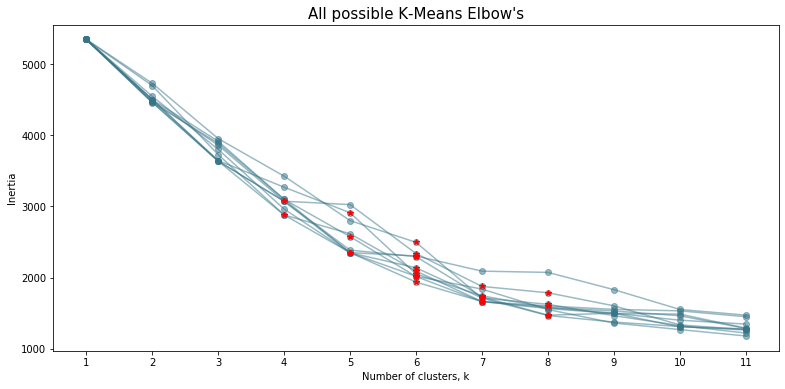

[5345.999999999996, 4458.597427221628, 3888.091921464448, 3098.9516242272293, 2574.668699623521, 2014.4678983950032, 1662.468441514513, 1564.5149041000252, 1494.7207424819753, 1486.2658768032663, 1289.971893267599]


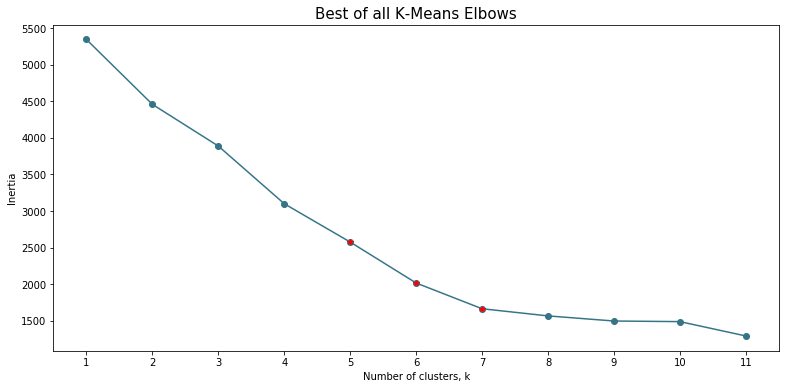

,Proximity Knees,Counts
0,6,10
1,7,8
2,8,5
3,5,5
4,4,2


,Main Knees,Counts
0,7,5
1,6,3
2,5,2


K-Medoids Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 17.14it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may b

convex
False
elbow_cluster:6
convex
False
elbow_cluster:6
convex
False
elbow_cluster:7
convex
False
elbow_cluster:4
convex
False
elbow_cluster:7
convex
False
elbow_cluster:5
convex
False
elbow_cluster:7
convex
False
elbow_cluster:5
convex
False
elbow_cluster:6
convex
False
elbow_cluster:5


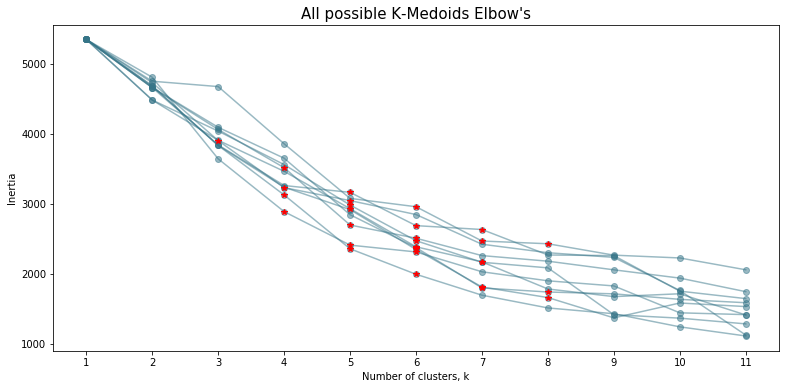

[5345.999999999996, 4480.8961864180665, 4037.4078491419214, 3559.134916647, 2981.6030161432786, 2472.560483546821, 2164.4964763364324, 2084.6884749147475, 1415.8750024956757, 1366.6523502383925, 1284.7239003138866]
Something went wrong when trying to save the model: K-Medoids
Something went wrong when trying to save the model: K-Medoids
Something went wrong when trying to save the model: K-Medoids


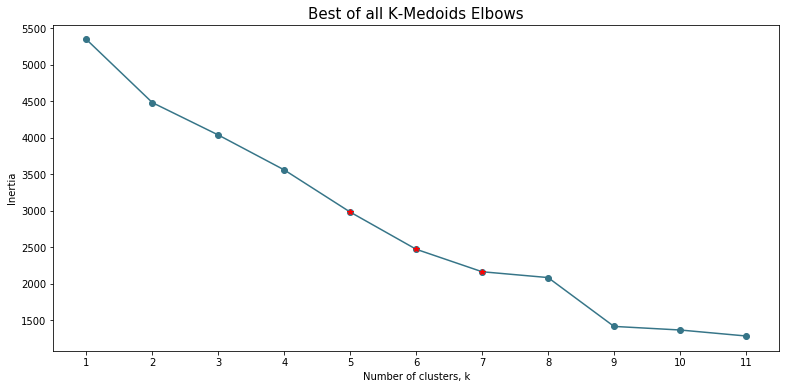

,Proximity Knees,Counts
1,6,9
0,5,7
2,7,6
5,4,4
3,8,3
4,3,1


,Main Knees,Counts
0,6,3
1,7,3
3,5,3
2,4,1


Somsc Elbow Seq Count 1: 100%|██████████| 11/11 [00:00<00:00, 16.01it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1147: RankWarning: Polyfit may be poorly conditioned
  curve = self.__determine_curve(inertias[i])


convex
False
elbow_cluster:6


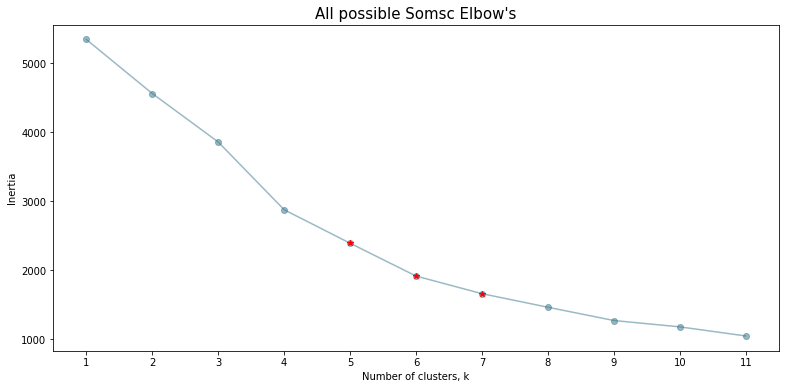

[5345.999999999996, 4563.181329613961, 3861.254277611249, 2879.4968249039216, 2394.1768828967092, 1918.7671435874695, 1663.0697560096817, 1466.634694966624, 1274.3341892725111, 1182.4562764068662, 1050.3844206890615]


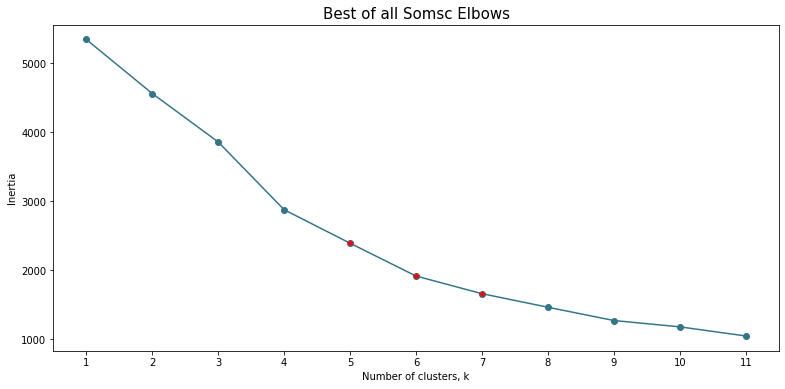

,Proximity Knees,Counts
0,5,1
1,6,1
2,7,1


,Main Knees,Counts
0,6,1


[5, 6, 7]

In [18]:
auto_cluster.create_elbow_models(
                                 sequences=10,
                                 max_k_value=11,
                                 display_visuals=True)

In [19]:
1/0

ZeroDivisionError: division by zero

In [ ]:
import numpy as np
# data = [5345.999999999996, 4910.043444707498, 4786.6048724215425, 4746.052353365308, 4129.726105238373, 2371.081276090588, 1985.9894627564358, 1683.6842207926986, 1401.4090593157666, 1237.7644835798546, 1129.9284793236557]

__determine_curve(a)

In [ ]:
df = pd.read_csv(dataset_path)
df

In [ ]:
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

In [ ]:
main_pipe.perform_pipeline(df,
                           df_features)

In [ ]:
df

In [ ]:
data_encoder = DataEncoder(create_file=False)

In [ ]:
data_encoder.revert_dummies(df,
                            df_features,
                            qualtative_features=list(df_features.get_dummy_encoded_features().keys()))

In [ ]:
cluster_profile_dict = dict()
for feature_name in df.columns:
    if feature_name in  df_features.continuous_numerical_features():
        cluster_profile_dict[feature_name] = df[feature_name].mean()
    else:
        cluster_profile_dict[feature_name] = df[feature_name].mode()[0]
        if feature_name in df_features.bool_features():
            if  cluster_profile_dict[feature_name] == 1:
                cluster_profile_dict[feature_name] = True
            elif cluster_profile_dict[feature_name] == 0:
                cluster_profile_dict[feature_name] = False
cluster_profile_dict

In [ ]:
# [i for i in range(0,len(cluster_profile_dict.keys()))]
# pd.DataFrame().from_dict([i for i in range(0,len(cluster_profile_dict.keys()))],cluster_profile_dict)

# pd.DataFrame([0]).from_dict(cluster_profile_dict, orient='columns')


In [ ]:
# auto_cluster.evaluate_all_models(df,
#                                  df_features)

In [ ]:
tolerance_levels = [round(2-(i/10),1) for i in range(0,50)]
tolerance_levels

In [ ]:
from kneed import KneeLocator
# a = [5345.999999999996, 4769.071391049416, 4158.399592836868, 3340.8021023743877, 2870.109287596405, 2808.098479255926, 2014.5453123462937, 2003.767425273727, 1939.0594338434253, 1189.3868282888945, 1224.9253303064186]
a = [5345.999999999996, 4910.047265855051, 4780.844136675267, 4745.434882932209, 4129.911819690948, 2371.081276090588, 1985.9894627564358, 1683.6842207926982, 1401.4090593157669, 1237.7644835798549, 1129.9284793236557] 
# a = [5345.999999999996, 4521.432217603588, 3872.3758580658987, 3077.592076226511, 2971.3362953765613, 2253.7686132419553, 2084.59728529815, 1850.8071178779078, 1624.0985754171677, 1591.9988368277868, 1590.8698733117187]
for s in tolerance_levels:
    print(s)
    elbow_cluster = KneeLocator(range(1,12),
                                a,
                                curve='convex',
                                S=s,
                                online=True,
                                direction='decreasing').elbow
    display(elbow_cluster)
    print()

In [ ]:
[i/10 for i in range(1,20)]

In [ ]:
raise ValueError("Testing")

In [ ]:
df.loc[[1,2,34]].reset_index(drop=True)

In [ ]:
def __determine_curve(intertia):
    convex_count = 0
    concave_count = 0
    for i in range(2, len(intertia) + 1):
        x = range(len(intertia))
        print(intertia[0:i][-1])
        poly = np.polyfit(x[0:i],
                          intertia[0:i],
                          2)
        if poly[1] > 0:
            print("Conv")
            convex_count += 1
        else:
            print("Cave")
            concave_count += 1
        print()

#     if concave_count >= convex_count:
#         return "concave"
#     else:
#         return "convex"

a = [5345.999999999996, 4909.904334989346, 4780.844136675267, 4743.852776203679, 4735.169650536558, 4081.0340751505682, 1985.9894627564358, 1683.6842207926986, 1401.4090593157669, 1237.7644835798549, 1129.9284793236557]

__determine_curve(a)